In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn import preprocessing;
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import linear_model;
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out);#creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]); #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True); #dropping na values
    y = np.array(label)  # assigning Y

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size)

    response = [X_train,X_test , Y_train, Y_test , X_lately];
    return response;

In [4]:
    df = pd.read_csv("./market-stat.csv") #loading the csv file
    df['DATE'] =  pd.to_datetime(df['DATE'], infer_datetime_format=True)
    df['YEAR'] = df['DATE'].dt.year
    df['MONTH'] = df['DATE'].dt.month_name()
    df['DAY'] = df['DATE'].dt.day_name()
    df['DIFFERENCE_PRICE']= df['CLOSE'] -df['OPEN']

    df=df[df.SYMBOL=='NTC']#choosing stock symbol

    forecast_col = 'CLOSE'#choosing which column to forecast
    forecast_out = 5 #how far to forecast 
    test_size = 0.2; #the size of my test set

    X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size); #calling the method were the cross validation and data preperation is in

    learner = linear_model.LinearRegression(); #initializing linear regression model

    learner.fit(X_train,Y_train); #training the linear regression model
    score=learner.score(X_test,Y_test);#testing the linear regression model

    forecast= learner.predict(X_lately); #set that will contain the forecasted data

In [5]:
df['DIFFERENCE_PRICE']= df['CLOSE'] -df['OPEN']

In [1]:
X_train

NameError: name 'X_train' is not defined

In [93]:
Y_train

array([450., 775., 530., ..., 446., 443., 576.])

In [94]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [95]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

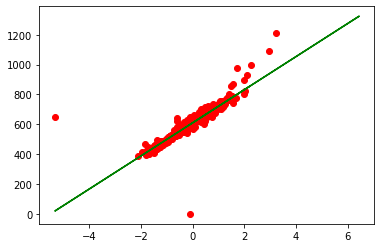

In [5]:
plt.scatter(X_test, Y_test, color = "red")
plt.plot(X_train, learner.predict(X_train), color = "green")
plt.show()

In [97]:
forecast

array([1209.5355595 , 1123.82911729, 1023.51362242,  931.96355914,
        893.00608541])

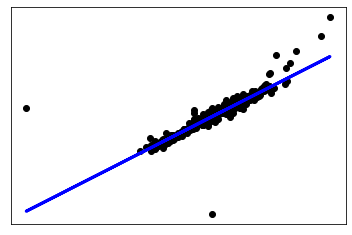

In [6]:
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, learner.predict(X_test), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

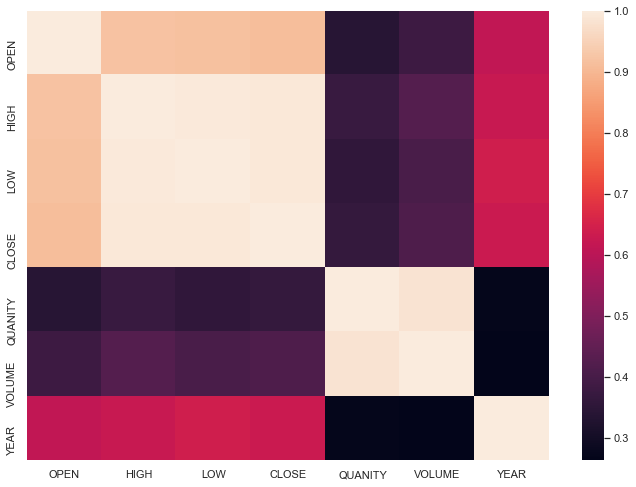

In [99]:
sns.heatmap(df.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215338F0C08>,
      dtype=object)

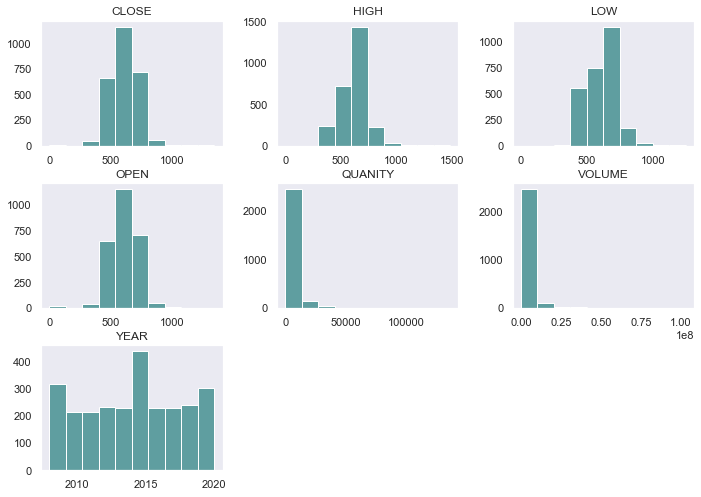

In [100]:
df.hist(grid = False, color = 'cadetblue')

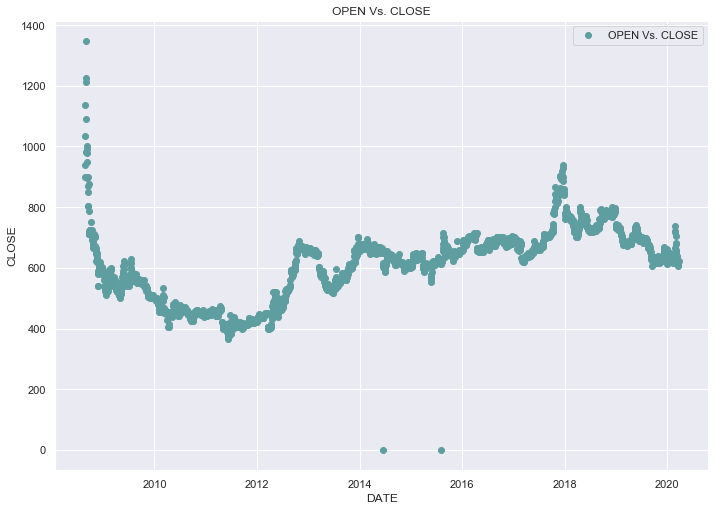

In [101]:
# define the x & y data.
x = df['DATE']
y = df['CLOSE']

# create the scatter plot.
plt.plot(x, y, 'o', color ='cadetblue', label = 'OPEN Vs. CLOSE')

# make sure it's formatted.
plt.title("OPEN Vs. CLOSE")
plt.xlabel("DATE")
plt.ylabel("CLOSE")
plt.legend()

plt.show()

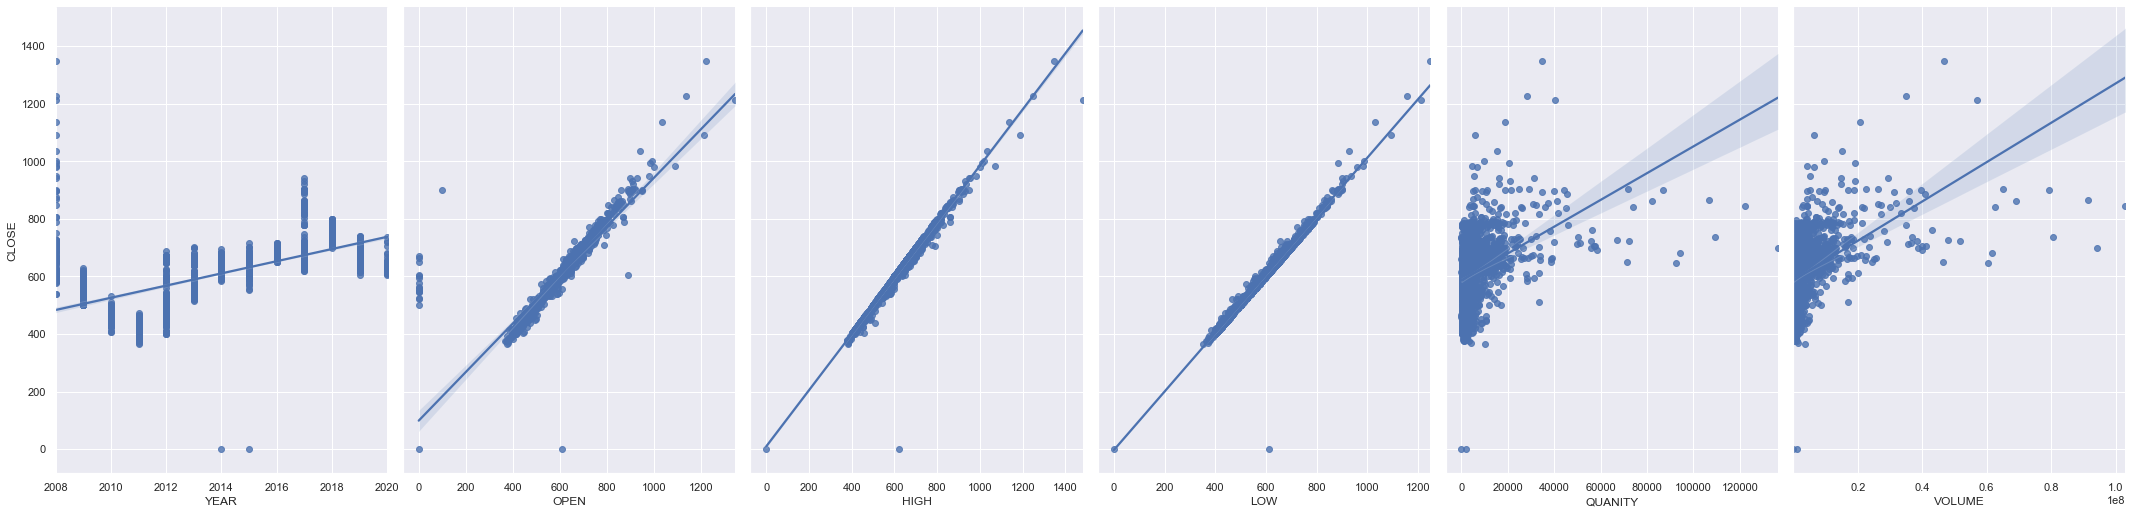

In [102]:
sns.pairplot(df,x_vars=['YEAR','OPEN','HIGH','LOW','QUANITY','VOLUME'],y_vars='CLOSE',height=7,aspect=0.7,kind='reg')

In [118]:
df.head(25)

,DATE,SYMBOL,OPEN,HIGH,LOW,CLOSE,QUANITY,VOLUME,YEAR,MONTH,DAY
1,2020-03-22,NTC,622.0,632.0,610.0,623.0,275,168765,2020,March,Sunday
3,2020-03-19,NTC,605.0,617.0,600.0,610.0,33369,20166504,2020,March,Thursday
5,2020-03-18,NTC,615.0,615.0,600.0,605.0,16277,9847086,2020,March,Wednesday
7,2020-03-17,NTC,632.0,632.0,607.0,609.0,27730,16901593,2020,March,Tuesday
9,2020-03-16,NTC,625.0,626.0,610.0,620.0,14334,8859338,2020,March,Monday
11,2020-03-15,NTC,640.0,640.0,615.0,617.0,13363,8338342,2020,March,Sunday
13,2020-03-12,NTC,649.0,649.0,625.0,633.0,8127,5137703,2020,March,Thursday
15,2020-03-11,NTC,647.0,666.0,628.0,639.0,18140,11527759,2020,March,Wednesday
17,2020-03-10,NTC,671.0,671.0,634.0,635.0,2653,1698963,2020,March,Tuesday
19,2020-03-05,NTC,642.0,666.0,642.0,658.0,9456,6202274,2020,March,Thursday


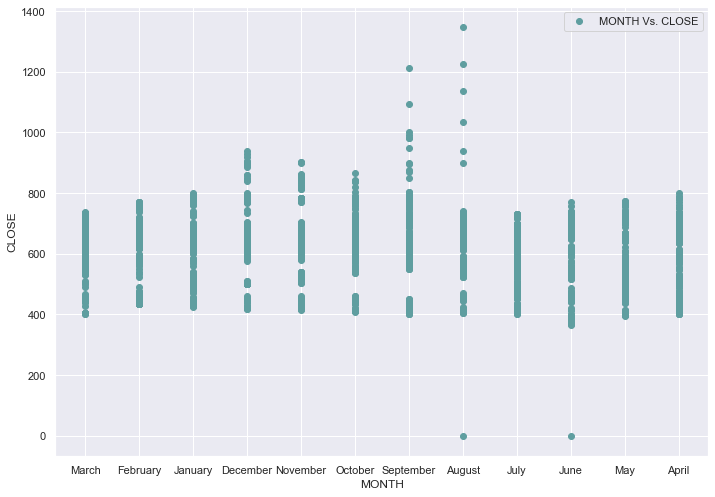

In [110]:
# define the x & y data.
x = df['MONTH']
y = df['CLOSE']

# create the scatter plot.
plt.plot(x, y, 'o', color ='cadetblue', label = 'MONTH Vs. CLOSE')

# make sure it's formatted.
plt.xlabel("MONTH")
plt.ylabel("CLOSE")
plt.legend()

plt.show()

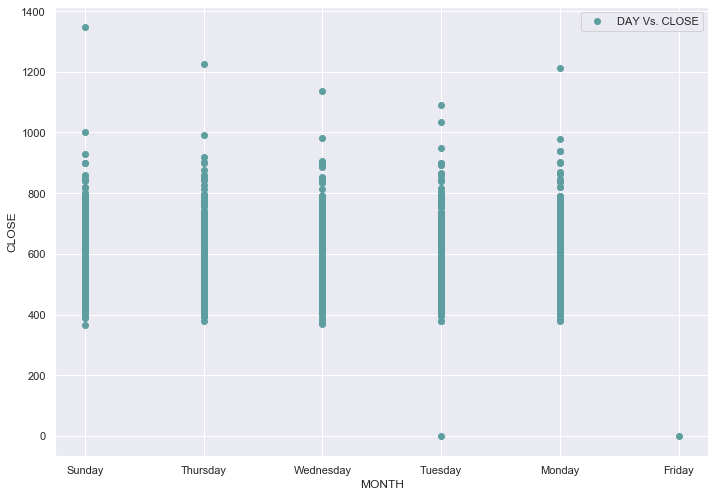

In [111]:
# define the x & y data.
x = df['DAY']
y = df['CLOSE']

# create the scatter plot.
plt.plot(x, y, 'o', color ='cadetblue', label = 'DAY Vs. CLOSE')

# make sure it's formatted.
plt.xlabel("MONTH")
plt.ylabel("CLOSE")
plt.legend()

plt.show()

In [117]:
df.corr()

,OPEN,HIGH,LOW,CLOSE,QUANITY,VOLUME,YEAR
OPEN,1.000000,0.919714,0.919260,0.912759,0.337775,0.383560,0.611944
HIGH,0.919714,1.000000,0.995534,0.991492,0.374230,0.426791,0.624295
LOW,0.919260,0.995534,1.000000,0.992290,0.355297,0.404693,0.641405
CLOSE,0.912759,0.991492,0.992290,1.000000,0.364276,0.413859,0.628596
QUANITY,0.337775,0.374230,0.355297,0.364276,1.000000,0.984964,0.268540
VOLUME,0.383560,0.426791,0.404693,0.413859,0.984964,1.000000,0.262777
YEAR,0.611944,0.624295,0.641405,0.628596,0.268540,0.262777,1.000000


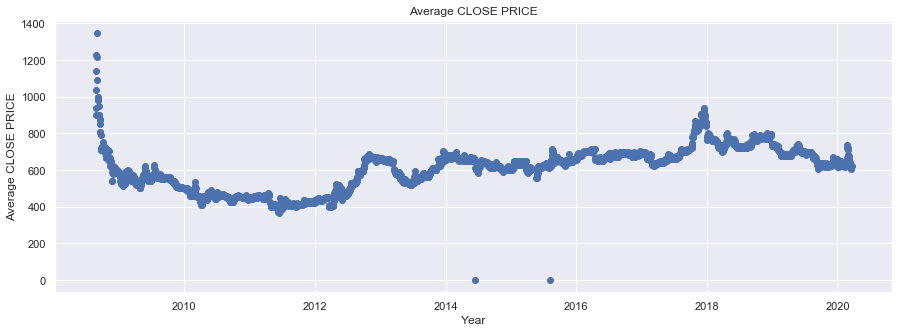

In [124]:
# Cursory plot
plt.figure(figsize = (15, 5))
plt.scatter(x = df['DATE'], y = df['CLOSE'])
plt.title("Average CLOSE PRICE")
plt.xlabel("Year")
plt.ylabel("Average CLOSE PRICE")
plt.show()

In [120]:
df.describe()


,OPEN,HIGH,LOW,CLOSE,QUANITY,VOLUME,YEAR
count,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2.640000e+03,2640.000000
mean,607.369515,616.100322,604.701390,610.395652,5102.347727,3.481343e+06,2014.008333
std,124.166651,116.521577,112.059467,114.576808,8985.774177,6.940992e+06,3.398605
min,0.000000,0.000000,0.000000,0.000000,4.000000,2.440000e+03,2008.000000
25%,529.500000,535.000000,526.000000,530.000000,1180.000000,6.248688e+05,2011.000000
50%,635.000000,639.000000,625.000000,634.000000,2557.500000,1.511050e+06,2014.000000
75%,682.000000,689.000000,677.000000,682.000000,5531.250000,3.637839e+06,2017.000000
max,1347.000000,1481.000000,1249.000000,1347.000000,136420.000000,1.030491e+08,2020.000000


In [130]:
df['DATE']

SyntaxError: invalid syntax (<ipython-input-130-f8025d8ca0a6>, line 1)

In [131]:
# Convert to datetime object
times = pd.DatetimeIndex(df['DATE'])

# Group by year
grouped = df.groupby([times.year]).mean()


In [132]:
times

DatetimeIndex(['2020-03-22', '2020-03-19', '2020-03-18', '2020-03-17',
               '2020-03-16', '2020-03-15', '2020-03-12', '2020-03-11',
               '2020-03-10', '2020-03-05',
               ...
               '2008-09-04', '2008-09-03', '2008-09-02', '2008-09-01',
               '2008-08-31', '2008-08-28', '2008-08-27', '2008-08-26',
               '2008-08-25', '2008-08-24'],
              dtype='datetime64[ns]', name='DATE', length=2640, freq=None)

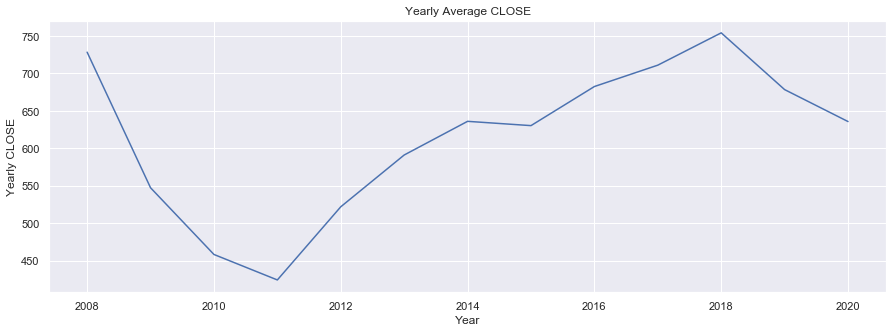

In [134]:
# Plot
plt.figure(figsize = (15, 5))
plt.plot(grouped['CLOSE'])

# Change features of the graph
plt.title("Yearly Average CLOSE")
plt.xlabel("Year")
plt.ylabel("Yearly CLOSE")
plt.show()

In [135]:
# What caused those anomalies?
grouped.head()

,OPEN,HIGH,LOW,CLOSE,QUANITY,VOLUME,YEAR
DATE,,,,,,,
2008,716.928571,745.916667,713.726190,728.404762,4766.547619,4.537157e+06,2008.0
2009,532.883117,551.606061,542.346320,547.350649,2088.398268,1.139484e+06,2009.0
2010,456.074419,461.283721,454.232558,458.237209,1338.325581,6.183140e+05,2010.0
2011,424.334884,427.302326,420.604651,424.204651,1312.674419,5.532752e+05,2011.0
2012,516.419913,527.004329,515.653680,521.891775,4042.012987,2.259650e+06,2012.0


In [137]:
# Check what happened in 2012
df[times.year == 2012]

,DATE,SYMBOL,OPEN,HIGH,LOW,CLOSE,QUANITY,VOLUME,YEAR,MONTH,DAY
3316,2012-12-31,NTC,664.0,663.0,655.0,659.0,4210,2769960,2012,December,Monday
3317,2012-12-27,NTC,666.0,674.0,662.0,664.0,6770,4522490,2012,December,Thursday
3318,2012-12-26,NTC,659.0,674.0,659.0,666.0,6795,4515185,2012,December,Wednesday
3319,2012-12-24,NTC,655.0,659.0,650.0,659.0,5585,3662865,2012,December,Monday
3320,2012-12-23,NTC,658.0,668.0,651.0,655.0,2320,1520030,2012,December,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
3656,2012-01-05,NTC,425.0,435.0,420.0,435.0,1040,440100,2012,January,Thursday
3658,2012-01-04,NTC,435.0,437.0,425.0,425.0,2020,865940,2012,January,Wednesday
3660,2012-01-03,NTC,436.0,435.0,430.0,435.0,1270,546250,2012,January,Tuesday
3662,2012-01-02,NTC,427.0,436.0,420.0,436.0,1055,452860,2012,January,Monday


In [138]:
# There are a lot of null values! What else?
df[np.isnan(df['CLOSE'])]

,DATE,SYMBOL,OPEN,HIGH,LOW,CLOSE,QUANITY,VOLUME,YEAR,MONTH,DAY


In [139]:
# Use previous valid observation to fill gap
df['CLOSE'] = df['CLOSE'].fillna(method='ffill')


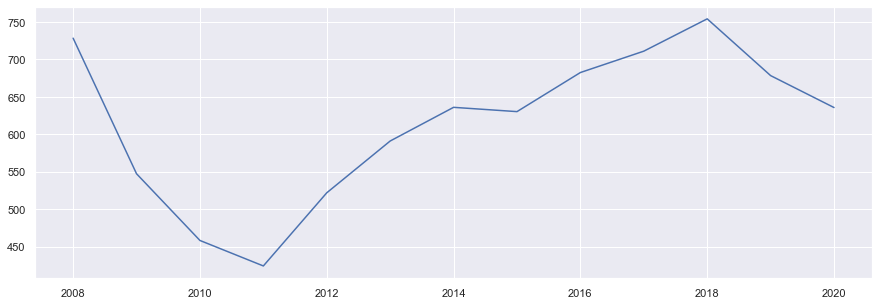

In [141]:
# Regroup and plot
grouped = df.groupby([times.year]).mean()

# Better, but still not perfect
# What are some other ways to fill the NaN values?
plt.figure(figsize = (15, 5))
plt.plot(grouped['CLOSE'])
plt.show()


In [158]:
df.head(25)

,DATE,SYMBOL,OPEN,HIGH,LOW,CLOSE,QUANITY,VOLUME,YEAR,MONTH,DAY
1,2020-03-22,NTC,622.0,632.0,610.0,623.0,275,168765,2020,March,Sunday
3,2020-03-19,NTC,605.0,617.0,600.0,610.0,33369,20166504,2020,March,Thursday
5,2020-03-18,NTC,615.0,615.0,600.0,605.0,16277,9847086,2020,March,Wednesday
7,2020-03-17,NTC,632.0,632.0,607.0,609.0,27730,16901593,2020,March,Tuesday
9,2020-03-16,NTC,625.0,626.0,610.0,620.0,14334,8859338,2020,March,Monday
11,2020-03-15,NTC,640.0,640.0,615.0,617.0,13363,8338342,2020,March,Sunday
13,2020-03-12,NTC,649.0,649.0,625.0,633.0,8127,5137703,2020,March,Thursday
15,2020-03-11,NTC,647.0,666.0,628.0,639.0,18140,11527759,2020,March,Wednesday
17,2020-03-10,NTC,671.0,671.0,634.0,635.0,2653,1698963,2020,March,Tuesday
19,2020-03-05,NTC,642.0,666.0,642.0,658.0,9456,6202274,2020,March,Thursday
